In [129]:
import numpy as np
import scipy as sp
import pandas as pd
from subprocess import check_output

import time, json
from datetime import date

import time
import math
import sklearn.preprocessing as prep
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams

In [130]:
df= pd.read_csv('groupeddf.csv')
df4=df.set_index("Code")

In [131]:
uniqueVals = df["Code"].unique()  


In [132]:
uniqueVals

array(['3IINFOTECH', '8KMILES', 'ABAN', 'ABB', 'ABBOTINDIA', 'ABIRLANUVO',
       'ACC', 'ADANIENT', 'ADANIPORTS', 'ADANIPOWER', 'AHMEDFORGE',
       'AIAENG', 'AIL', 'AJANTPHARM', 'AKZOINDIA', 'ALBK', 'ALEMBICLTD',
       'ALLCARGO', 'ALOKTEXT', 'AMARAJABAT', 'AMBUJACEM', 'AMTEKAUTO',
       'AMTEKINDIA', 'ANANTRAJ', 'ANDHRABANK', 'APLLTD', 'APOLLOHOSP',
       'APOLLOTYRE', 'ARCOTECH', 'ARVIND', 'ARVINDREM', 'ASHOKA',
       'ASHOKLEY', 'ASIANPAINT', 'ASTRAL', 'ASTRAMICRO', 'ATFL',
       'ATULAUTO', 'AURIONPRO', 'AUROPHARMA', 'AXISBANK', 'AXISCADES',
       'BAJAJCORP', 'BAJAJELEC', 'BAJAJFINSV', 'BAJAJHIND', 'BAJAJHLDNG',
       'BAJFINANCE', 'BALKRISIND', 'BALMLAWRIE', 'BALRAMCHIN',
       'BANKBARODA', 'BANKINDIA', 'BATAINDIA', 'BAYERCROP', 'BBL', 'BBTC',
       'BEL', 'BEML', 'BERGEPAINT', 'BFUTILITIE', 'BGRENERGY',
       'BHARATFORG', 'BHARTIARTL', 'BHEL', 'BIOCON', 'BLUEDART',
       'BOMDYEING', 'BOSCHLTD', 'BPCL', 'BPL', 'BRITANNIA', 'CADILAHC',
       'CAIRN', 'CANBK', 'CA

In [133]:
grouped_df=pd.DataFrame()
for i in uniqueVals:
    df5 = (df4.loc[i,:]).groupby(['Code','Date']).mean()
    # store DataFrame in list
    grouped_df=grouped_df.append(df5)
grouped_df.reset_index()
del df5

In [154]:
#'3IINFOTECH', '8KMILES', 'ABAN'

df1=grouped_df.loc["8KMILES",:]
df2=df1.reset_index()
label=df2['Date'].values.tolist()
trainset=df2['Open'].values.tolist()
df2

,Date,Open,High,Low,Close,Volume
0,2014-12-18,561.963918,562.615636,561.317698,562.008419,148.219931
1,2014-12-19,588.985235,589.995805,588.078859,589.031208,335.969799
2,2014-12-22,603.079123,603.608772,602.417544,603.047193,169.870175
3,2014-12-23,600.358528,600.876254,599.931438,600.357692,97.444816
4,2014-12-24,588.538106,589.038987,588.018722,588.531498,117.449339
5,2014-12-26,584.741781,585.234018,584.137671,584.621461,94.899543
6,2014-12-29,582.528571,582.955357,582.019420,582.478795,100.584821
7,2014-12-30,591.130458,591.744894,590.550704,591.180810,241.443662
8,2014-12-31,624.332622,625.117530,623.668293,624.479726,490.500000
9,2015-01-01,657.843023,658.928073,656.947841,658.116944,1082.561462


In [155]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [156]:
def create_dataset(dataset,past=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-past-1):
        j = dataset[i:(i+past), 0]
        dataX.append(j)
        dataY.append(dataset[i + past, 0])
    return np.array(dataX), np.array(dataY)

In [157]:
from sklearn.preprocessing import MinMaxScaler
def testandtrain(prices):
    scaler = MinMaxScaler(feature_range=(0, 1))
    prices = scaler.fit_transform(prices)
    trainsize = int(len(prices) * 0.80)
    testsize = len(prices) - trainsize
    train, test = prices[0:trainsize,:], prices[trainsize:len(prices),:]
    print(len(train), len(test))
    
    x_train,y_train = create_dataset(train,1)
    x_test,y_test = create_dataset(test,1)
    
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.fit_transform(x_test)
    #y_test =scaler.fit_transform(y_test)
    #y_train=scaler.fit_transform(y_train)
    return x_train,y_train, x_test,y_test





In [158]:
prices = df2['Close'].values.astype('float32') 
# Obtaining the values of closing data each day and converting to float as Neural network can easily model float 
prices = prices.reshape(len(prices), 1)
prices.shape



(183L, 1L)

In [159]:
trainX, trainY, testX, testY=testandtrain(prices)

(146, 37)


In [160]:
randomforest  = RandomForestRegressor(random_state=2017,verbose=2,n_jobs=5) #random forest algorithm

In [161]:
randomforest.fit(trainX,trainY)

building tree 1 of 10building tree 2 of 10 building tree 4 of 10 

building tree 3 of 10
building tree 5 of 10 building tree 6 of 10
building tree 9 of 10
building tree 7 of 10
 
 
building tree 8 of 10building tree 10 of 10



[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=5,
           oob_score=False, random_state=2017, verbose=2, warm_start=False)

In [162]:
test=[]
test= randomforest.predict(testX)

[Parallel(n_jobs=5)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=5)]: Done  10 out of  10 | elapsed:    0.0s finished


In [163]:
testY

array([ 0.3665992 ,  0.34853208,  0.33670419,  0.34559941,  0.36045766,
        0.37352097,  0.37168431,  0.46163356,  0.49432492,  0.4646306 ,
        0.42408788,  0.57748544,  0.73742938,  0.7817353 ,  0.75124586,
        0.7573086 ,  0.76831853,  0.83454478,  0.79339325,  0.81948578,
        0.82750404,  0.94312084,  0.91194749,  0.9489646 ,  0.94456089,
        0.95504785,  0.98091006,  0.97550523,  1.        ,  0.99246335,
        0.97640789,  0.99884188,  0.98394489,  0.94990647,  0.96937025], dtype=float32)

In [164]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

#mean_squared_error(test,testY)

0.502885160662743

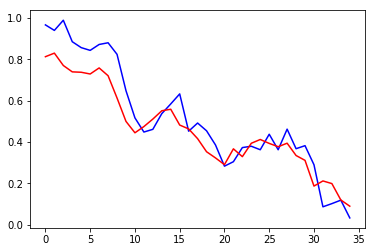

In [75]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()

In [126]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
regr = linear_model.LinearRegression()
regr.fit(trainX, trainY)
test= regr.predict(testX)


In [127]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(test,testY))

0.25484127

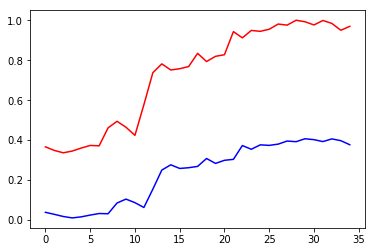

In [128]:
plt.plot(test,color="blue")
plt.plot(testY,color='red')
plt.show()